<a href="https://colab.research.google.com/github/siddeshnaik/Sparks_Foundation/blob/main/Terrorisum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
!unzip '/content/drive/MyDrive/SPARKS_FOUNDATION/Global_Terrorism_START_data.zip'

Archive:  /content/drive/MyDrive/SPARKS_FOUNDATION/Global_Terrorism_START_data.zip
  inflating: globalterrorismdb_0718dist.csv  


#NEW START

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [9]:
given_data = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='cp1252', low_memory=False)
given_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#####Looking into Data

In [10]:
given_data.shape 

(181691, 135)

In [11]:
given_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
given_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

#####Data Cleaning

In [13]:
df = given_data[['eventid', 'iyear','imonth','country_txt', 
           'region_txt', 'latitude', 'longitude', 
           'provstate', 'city', 'crit1', 'crit2', 'crit3', 
           'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 
           'targsubtype1_txt', 'natlty1_txt','gname', 'gsubname', 'guncertain1', 
           'claimed', 'weaptype1_txt', 'weapsubtype1', 'nkill','nwound' ]].copy()
#Renaming for further use
df.rename(columns = {'eventid' : 'EventId', 
                     'iyear' : 'Year',
                     'imonth' : 'Month',
                     'country_txt': 'Country', 
                     'region_txt' : 'Region', 
                     'provstate' : 'Provstate', 
                     'city' : 'City', 
                     'crit1' : 'Crit1', 
                     'crit2' : 'Crit2', 
                     'crit3' : 'Crit3', 
                     'success' : 'Success', 
                     'suicide' : 'Suicide', 
                     'attacktype1_txt' : 'AttackType', 
                     'targtype1_txt' : 'TargType', 
                     'targsubtype1_txt' : 'TargSubType', 
                     'natlty1_txt' : 'Nationality', 
                     'gname' : 'Group', 
                     'guncertain1' : 'GunCertain1', 
                     'claimed' : 'Claimed', 
                     'weaptype1_txt' : 'WeaponType',
                     'weapsubtype1' : 'WeaponSubType', 
                     'nkill' : 'Killed',
                     'nwound' : 'Wounded'}, inplace = True)

In [14]:
df.head()

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,0.0,NaN,Unknown,NaN,1.0,0.0
1,197000000002,1970,0,Mexico,North America,19.371887,-99.086624,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,NaN,0.0,NaN,Unknown,NaN,0.0,0.0
2,197001000001,1970,1,Philippines,Southeast Asia,15.478598,120.599741,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,0.0,NaN,Unknown,NaN,1.0,0.0
3,197001000002,1970,1,Greece,Western Europe,37.997490,23.762728,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Explosives,16.0,NaN,NaN
4,197001000003,1970,1,Japan,East Asia,33.580412,130.396361,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Incendiary,NaN,NaN,NaN


In [15]:
df['Casualities'] = df['Killed'] + df['Wounded']

In [16]:
df.head()

,EventId,Year,Month,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,AttackType,TargType,TargSubType,Nationality,Group,gsubname,GunCertain1,Claimed,WeaponType,WeaponSubType,Killed,Wounded,Casualities
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,0.0,NaN,Unknown,NaN,1.0,0.0,1.0
1,197000000002,1970,0,Mexico,North America,19.371887,-99.086624,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,NaN,0.0,NaN,Unknown,NaN,0.0,0.0,0.0
2,197001000001,1970,1,Philippines,Southeast Asia,15.478598,120.599741,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,0.0,NaN,Unknown,NaN,1.0,0.0,1.0
3,197001000002,1970,1,Greece,Western Europe,37.997490,23.762728,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Explosives,16.0,NaN,NaN,NaN
4,197001000003,1970,1,Japan,East Asia,33.580412,130.396361,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,0.0,NaN,Incendiary,NaN,NaN,NaN,NaN


#####Looking into data

In [17]:
df['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

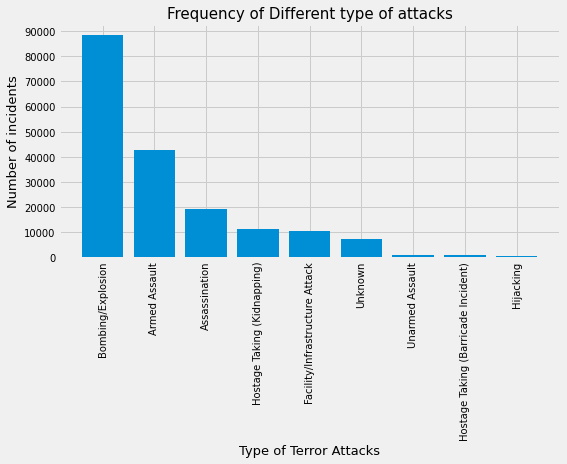

In [18]:
plt.figure(figsize=(8,4))
#plt.hist(df['AttackType'], bins=18)
plt.bar(list(df['AttackType'].value_counts().index),df['AttackType'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,100000,10000), fontsize=10)
plt.grid(True)
plt.xlabel('Type of Terror Attacks', fontsize=13)
plt.ylabel('Number of incidents', fontsize=13)
plt.title('Frequency of Different type of attacks', fontsize=15)
plt.show()

In [19]:
most_attacked_countries=df['Country'].value_counts().head(30)
most_attacked_countries

Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Russia                       2194
Israel                       2183
Guatemala                    2050
South Africa                 2016
Nicaragua     

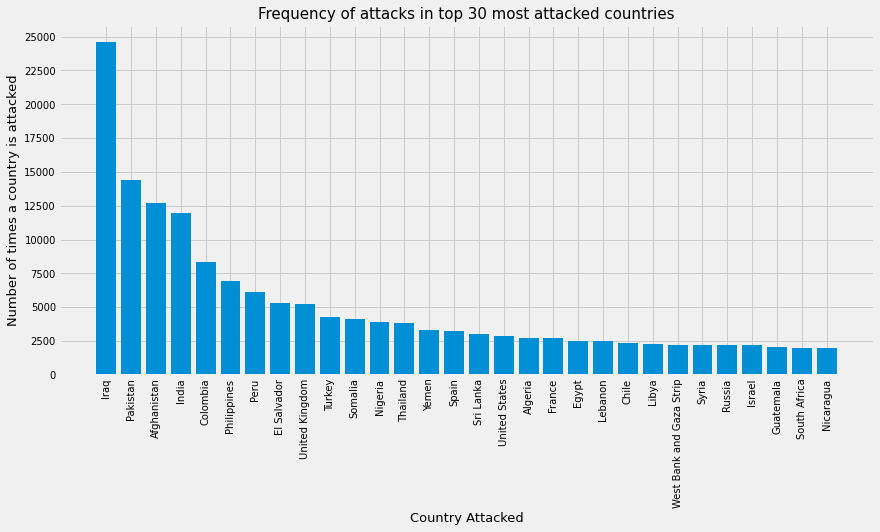

In [21]:
plt.figure(figsize=(13,6))
plt.bar(list(most_attacked_countries.index),most_attacked_countries)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,27500,2500), fontsize=10)
plt.grid(True)
plt.xlabel('Country Attacked', fontsize=13)
plt.ylabel('Number of times a country is attacked', fontsize=13)
plt.title('Frequency of attacks in top 30 most attacked countries', fontsize=15)
plt.show()

In [22]:
df['TargType'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargType, dtype: int64

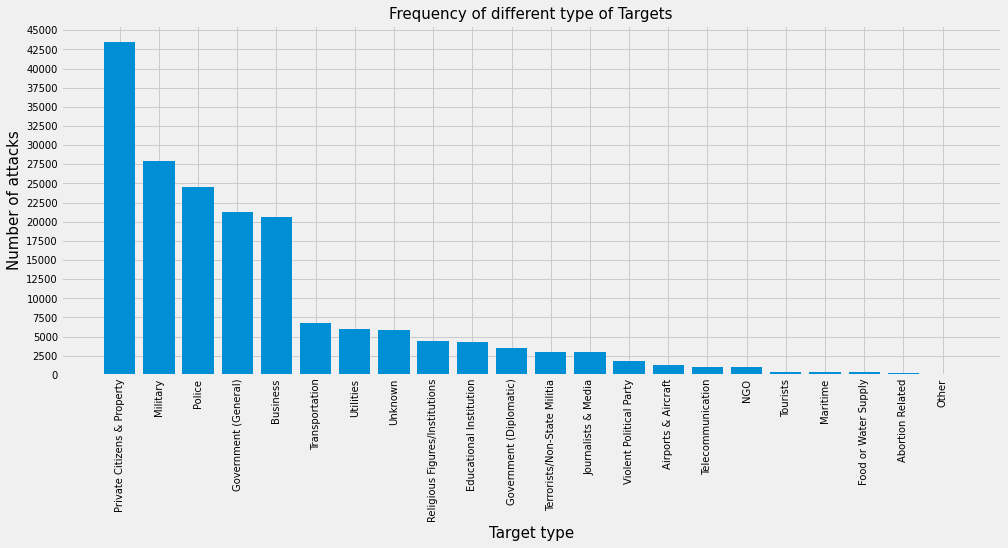

In [23]:
plt.figure(figsize=(15,6))
plt.bar(list(df['TargType'].value_counts().index), df['TargType'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,47500,2500), fontsize=10)
plt.grid(True)
plt.xlabel('Target type', fontsize=15)
plt.ylabel('Number of attacks', fontsize=15)
plt.title('Frequency of different type of Targets', fontsize=15)
plt.show()

In [24]:
df['Nationality'].value_counts().head(20)

Iraq                24113
Pakistan            13900
India               12098
Afghanistan         10931
Colombia             7922
Philippines          6685
Peru                 5840
El Salvador          5212
United States        5065
Turkey               4636
Israel               4097
Thailand             3804
Nigeria              3759
Northern Ireland     3367
Somalia              3160
Yemen                3123
Spain                3096
France               2918
Sri Lanka            2851
International        2699
Name: Nationality, dtype: int64

In [25]:
Terrorisum_groups=df['Group'].value_counts().head(30)
Terrorisum_groups 

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

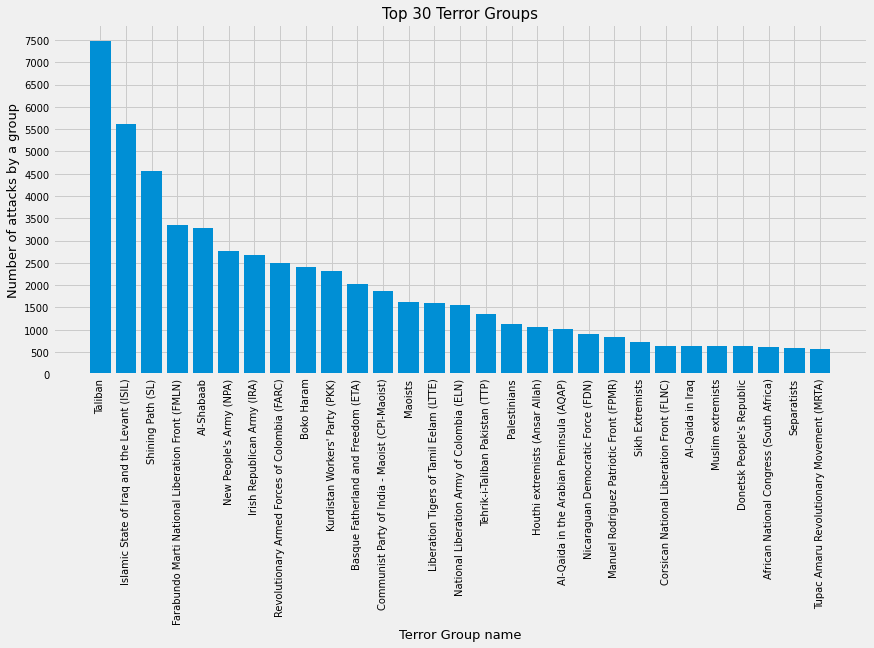

In [26]:
if 'Unknown' in Terrorisum_groups.index:
    Terrorisum_groups.drop('Unknown', axis=0, inplace=True)
plt.figure(figsize=(13,6))
plt.bar(list(Terrorisum_groups.index),Terrorisum_groups)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,8000,500), fontsize=10)
plt.grid(True)
plt.xlabel('Terror Group name', fontsize=13)
plt.ylabel('Number of attacks by a group', fontsize=13)
plt.title('Top 30 Terror Groups', fontsize=15)
plt.show()

In [27]:
casualities_per_country=df.groupby(['Country'])['Casualities'].sum()
casualities_per_country.sort_values(ascending=False).head(20)

Country
Iraq             202982.0
Afghanistan       80213.0
Pakistan          64427.0
India             47108.0
Sri Lanka         29792.0
United States     24469.0
Colombia          23767.0
Philippines       22361.0
Nigeria           21728.0
Syria             21614.0
Algeria           19296.0
Somalia           16720.0
Turkey            16694.0
Yemen             16288.0
Peru              16246.0
El Salvador       16181.0
Lebanon           14765.0
Russia            11126.0
Thailand          10476.0
Nicaragua         10437.0
Name: Casualities, dtype: float64

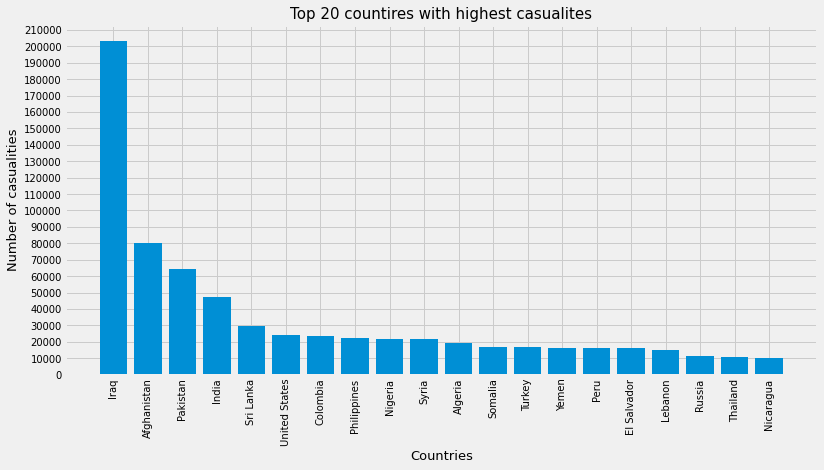

In [28]:
countries_with_casualities=casualities_per_country.sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.bar(list(countries_with_casualities.index), countries_with_casualities)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,220000,10000), fontsize=10)
plt.grid(True)
plt.xlabel('Countries', fontsize=13)
plt.ylabel('Number of casualities', fontsize=13)
plt.title('Top 20 countires with highest casualites', fontsize=15)
plt.show()

In [29]:
#deaths in usa are less
deaths_per_country=df.groupby(['Country'])['Killed'].sum()
deaths_per_country.sort_values(ascending=False).head(20)

Country
Iraq                                78589.0
Afghanistan                         39384.0
Pakistan                            23822.0
Nigeria                             22682.0
India                               19341.0
Sri Lanka                           15530.0
Syria                               15229.0
Colombia                            14698.0
Peru                                12771.0
El Salvador                         12053.0
Algeria                             11066.0
Nicaragua                           10598.0
Somalia                             10273.0
Philippines                          9559.0
Yemen                                8776.0
Turkey                               6888.0
Guatemala                            5167.0
Russia                               4308.0
Burundi                              4205.0
Democratic Republic of the Congo     4069.0
Name: Killed, dtype: float64

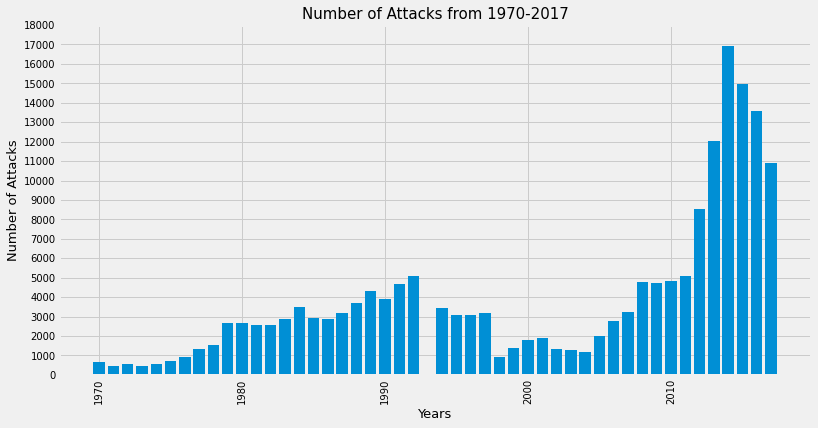

In [61]:
# years with highest attack rates
plt.figure(figsize=(12,6))
plt.bar(list(df['Year'].value_counts().index), df['Year'].value_counts())
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(np.arange(0,19000,1000), fontsize=10)
plt.grid(True)
plt.xlabel('Years', fontsize=13)
plt.ylabel('Number of Attacks', fontsize=13)
plt.title('Number of Attacks from 1970-2017', fontsize=15)
plt.show()

In [59]:
#year , country wise attacks
Year_wise_attacked_countries=pd.DataFrame(df.groupby(['Year','Country' ])['Year'].count())
Year_wise_attacked_countries

Year
Year Country                       
1970 Argentina                   21
     Australia                    1
     Belgium                      1
     Bolivia                      1
     Brazil                       6
...                             ...
2017 Vietnam                      2
     West Bank and Gaza Strip    83
     Yemen                      226
     Zambia                       2
     Zimbabwe                     3

[3762 rows x 1 columns]

In [76]:
pd.DataFrame({'Casualities':df.groupby(['AttackType'])['Casualities'].sum(),
                      'Incidents': df['AttackType'].value_counts(),
                      'Casuality_rate': df.groupby(['AttackType'])['Casualities'].sum().div(df['AttackType'].value_counts())})


,Casualities,Incidents,Casuality_rate
Armed Assault,212386.0,42669,4.977525
Assassination,37209.0,19312,1.926729
Bombing/Explosion,514233.0,88255,5.826673
Facility/Infrastructure Attack,6293.0,10356,0.607667
Hijacking,20642.0,659,31.323217
Hostage Taking (Barricade Incident),7465.0,991,7.532795
Hostage Taking (Kidnapping),20267.0,11158,1.816365
Unarmed Assault,14791.0,1015,14.572414
Unknown,39606.0,7276,5.443375


In [79]:
#Number of incidents
df['WeaponType'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [92]:
pd.DataFrame({'No. of incidents' : df['WeaponType'].value_counts(),
              'No. of Successful Incidents':df.groupby(['WeaponType'])['Success'].sum(),
              'Success Ratio': df.groupby(['WeaponType'])['Success'].sum()/df['WeaponType'].value_counts()})

,No. of incidents,No. of Successful Incidents,Success Ratio
Biological,35,15,0.428571
Chemical,321,243,0.757009
Explosives,92426,79746,0.862809
Fake Weapons,33,18,0.545455
Firearms,58524,54090,0.924236
Incendiary,11135,10472,0.940458
Melee,3655,3286,0.899042
Other,114,90,0.789474
Radiological,14,2,0.142857
Sabotage Equipment,141,133,0.943262
